# OCTIS Models Evaluation

## Prologue & Imports

We will evaluate the performance of most relevant OCTIS models as a baseline for non-SOTA Topic Modeling. These models will be compared on the same preprocessed dataset, the same number of topics and the same evaluation metrics.

In [1]:
from octis.models.LSI import LSI
from octis.models.NMF import NMF
from octis.models.LDA import LDA
from octis.models.HDP import HDP
from octis.models.NeuralLDA import NeuralLDA
from octis.models.ProdLDA import ProdLDA
from octis.dataset.dataset import Dataset
from octis.evaluation_metrics.coherence_metrics import Coherence
from octis.evaluation_metrics.diversity_metrics import TopicDiversity, KLDivergence
from octis.evaluation_metrics.similarity_metrics import RBO, PairwiseJaccardSimilarity
from octis.evaluation_metrics.topic_significance_metrics import KL_uniform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from spacy.lang.el.stop_words import STOP_WORDS as el_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop

from utils.data_loader import GreekPMDataloader
from models.octis.utils.preprocessor_gr import GreekStanzaPreprocessor
from models.octis.config.preprocessing import preprocessor_gr_params
from models.octis.config.models import NUM_TOPICS, lsi_params, nmf_params, lda_params, hdp_params, neural_lda_params, prod_lda_params
from models.octis.config.optimization import OPTIMIZATION_RESULT_PATH, TOP_K, NUM_PROCESSES, MODEL_RUNS, search_space
from models.octis.utils.model_evaluator import OCTISModelEvaluator

import pandas as pd

2024-04-08 16:43:31 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-08 16:43:32 INFO: Downloaded file to /Users/dion/stanza_resources/resources.json
2024-04-08 16:43:32 WARNING: Language el package default expects mwt, which has been added
2024-04-08 16:43:32 INFO: Loading these models for language: el (Greek):
| Processor | Package                 |
---------------------------------------
| tokenize  | gdt                     |
| mwt       | gdt                     |
| pos       | models/oct..._tagger.pt |
| lemma     | models/oct...matizer.pt |

2024-04-08 16:43:32 INFO: Using device: cpu
2024-04-08 16:43:32 INFO: Loading: tokenize
2024-04-08 16:43:32 INFO: Loading: mwt
2024-04-08 16:43:32 INFO: Loading: pos
2024-04-08 16:43:32 INFO: Loading: lemma
2024-04-08 16:43:32 INFO: Done loading processors!


## Dataset Loading

Our dataset has already been preprocessed in the `analysis` notebook, so we will load it directly.

In [2]:
dataset = Dataset()
dataset.load_custom_dataset_from_folder('models/octis/data/dataset')
print("Dataset found cached - loading...")

Dataset found cached - loading...


In [3]:
corpus = dataset.get_corpus()

## Evaluation Metrics

In [4]:
coherence_npmi = Coherence(texts=corpus, topk=TOP_K, processes=NUM_PROCESSES, measure='c_npmi')
coherence_cv = Coherence(texts=corpus, topk=TOP_K, processes=NUM_PROCESSES, measure='c_v')
coherence_umass = Coherence(texts=corpus, topk=TOP_K, processes=NUM_PROCESSES, measure='u_mass')
coherence_uci = Coherence(texts=corpus, topk=TOP_K, processes=NUM_PROCESSES, measure='c_uci')

diversity_topic = TopicDiversity(topk=TOP_K)
diversity_kl = KLDivergence()

similarity_rbo = RBO(topk=TOP_K)
similarity_pjs = PairwiseJaccardSimilarity()

significance_kluni = KL_uniform()

other_metrics = [coherence_npmi, coherence_umass, coherence_uci, diversity_topic, diversity_kl, similarity_rbo, similarity_pjs, significance_kluni]

In [5]:
metrics = {"coherence_npmi": coherence_npmi, "coherence_cv": coherence_cv, "coherence_umass": coherence_umass, "coherence_uci": coherence_uci, "diversity_topic": diversity_topic, "diversity_kl": diversity_kl, "similarity_rbo": similarity_rbo, "similarity_pjs": similarity_pjs, "significance_kluni": significance_kluni}

## Model Initialization

In [6]:
lsi_model = LSI(**lsi_params)
lda_model = LDA(**lda_params)
hdp_model = HDP(**hdp_params)
nmf_model = NMF(**nmf_params)
neural_lda_model = NeuralLDA(**neural_lda_params)
prod_lda_model = ProdLDA(**prod_lda_params)

In [7]:
models = {"lsi": lsi_model, "lda": lda_model, "hdp": hdp_model, "nmf": nmf_model, "neural_lda": neural_lda_model, "prod_lda": prod_lda_model}

## Evaluation

In [8]:
evaluator = OCTISModelEvaluator(dataset=dataset, 
                                models=models,
                                metrics=metrics,
                                topics=NUM_TOPICS,
                            )

In [9]:
evaluator.evaluate()

Epoch: [1/100]	Samples: [1439/143900]	Train Loss: 3309.578195578527	Time: 0:00:00.153859
Epoch: [1/100]	Samples: [160/16000]	Validation Loss: 157133.876171875	Time: 0:00:00.134120
Epoch: [2/100]	Samples: [2878/143900]	Train Loss: 3212.526244353718	Time: 0:00:00.127736
Epoch: [2/100]	Samples: [160/16000]	Validation Loss: 5695.304638671875	Time: 0:00:00.008331
Epoch: [3/100]	Samples: [4317/143900]	Train Loss: 3151.7829873175815	Time: 0:00:00.126405
Epoch: [3/100]	Samples: [160/16000]	Validation Loss: 2967.98310546875	Time: 0:00:00.005766
Epoch: [4/100]	Samples: [5756/143900]	Train Loss: 3134.0603337821403	Time: 0:00:00.106192
Epoch: [4/100]	Samples: [160/16000]	Validation Loss: 2925.7390625	Time: 0:00:00.004400
Epoch: [5/100]	Samples: [7195/143900]	Train Loss: 3111.042423123697	Time: 0:00:00.100998
Epoch: [5/100]	Samples: [160/16000]	Validation Loss: 2926.52529296875	Time: 0:00:00.005090
Epoch: [6/100]	Samples: [8634/143900]	Train Loss: 3095.9071023714387	Time: 0:00:00.118914
Epoch: [6/1

/Users/dion/Library/CloudStorage/GoogleDrive-dion.rigatos@gmail.com/My Drive/Archivio/University/Classes/Erasmus Courses/NLP/NLP Project/greek-pm-topic-modeling/src/models/octis/utils/model_evaluator.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.evaluation_df = pd.concat([self.evaluation_df, pd.DataFrame(model_metric_data)], ignore_index=True)
/Users/dion/.pyenv/versions/3.11.8/envs/nlp-env/lib/python3.11/site-packages/octis/evaluation_metrics/diversity_metrics.py:244: RuntimeWarning: invalid value encountered in log
  divergence = np.sum(P*np.log(P/Q))
/Users/dion/.pyenv/versions/3.11.8/envs/nlp-env/lib/python3.11/site-packages/octis/evaluation_metrics/topic_significance_metrics.py:24: RuntimeWarning: invalid value encountered 

,model,coherence_npmi,coherence_cv,coherence_umass,coherence_uci,diversity_topic,diversity_kl,similarity_rbo,similarity_pjs,significance_kluni
0,lsi,0.025563,0.572939,-1.782479,-1.036075,0.580000,0.383996,0.040895,0.031919,0.190002
1,lda,0.134951,0.678278,-1.284552,0.430626,0.840000,2.162542,0.010660,0.013345,1.433578
2,hdp,-0.019949,0.528939,-2.071623,-1.902802,0.536000,0.797088,0.018032,0.014762,0.439017
3,nmf,0.086590,0.615499,-1.506233,0.011993,0.626667,3.983607,0.034041,0.029840,2.047832
4,neural_lda,0.061586,0.615589,-1.483384,-0.202577,1.000000,1.521690,0.000000,0.000363,0.918635
5,prod_lda,-0.002676,0.633329,-2.297171,-3.044045,0.920000,NaN,0.004981,0.004662,NaN


In [ ]:
def 

In [27]:
len(evaluator.model_outputs['lsi']["topics"])

30

In [28]:
len(evaluator.model_outputs['lsi']['test-topic-document-matrix'])

30

In [20]:
document_topic_dict = {}

for topic_vals in evaluator.model_outputs['lsi']['test-topic-document-matrix']:
    for 
        

,0,1,2,3,4,5,6,7,8,9,...,273,274,275,276,277,278,279,280,281,282
0,0.001556,0.008685,0.016658,0.010158,0.026640,0.004555,0.002319,0.019918,0.001385,0.010697,...,0.009203,0.000436,0.017963,0.003668,0.031089,0.022460,0.036401,0.045490,0.003317,0.018992
1,0.620238,11.961033,4.601961,3.687636,7.580753,1.058169,0.927287,3.999215,0.196041,2.971383,...,1.899192,0.121965,1.077368,0.793090,4.155258,2.532366,0.902579,6.867460,0.914505,3.006130
2,0.754631,-2.736365,3.887830,6.285990,16.039855,1.474531,0.855913,8.139309,0.674300,5.752355,...,3.160371,0.149872,2.109239,2.341219,6.449609,6.591298,1.684250,13.162508,1.986934,2.064962
3,0.026167,0.993528,0.386539,0.422075,6.238348,0.567780,-0.011032,2.859301,0.277063,1.361031,...,0.726070,0.090506,0.030961,1.243211,2.629160,2.194543,0.823981,1.261460,0.279015,0.253847
4,0.683686,3.291568,2.154929,0.690504,-0.181502,0.234701,0.090836,-0.189927,0.050713,0.510784,...,0.362866,-0.059327,0.753192,-0.171747,0.480394,0.641828,0.592399,2.909516,0.034914,1.372603
5,0.384559,-0.342262,1.893386,4.056459,3.640351,1.434934,0.690987,3.324661,0.415554,1.462087,...,2.775988,0.049301,1.275254,-0.772081,2.438249,0.212245,0.878324,3.442137,1.341779,0.652804
6,0.660988,-0.585168,4.425960,6.902160,5.569548,2.917266,1.436834,8.554393,1.044398,1.257102,...,5.749372,0.269244,2.419317,0.915887,4.762761,3.267045,1.727617,1.631405,2.820262,2.453597
7,0.337070,-0.502898,-0.566064,1.611727,0.749148,-0.325006,0.102400,0.263578,-0.043836,1.485626,...,-0.349562,0.046185,-0.010754,-0.302253,0.998772,0.220858,0.004853,0.965522,0.409355,-0.153756
8,-0.353721,-0.522618,-0.234680,-8.578236,1.826893,-1.077162,-0.455289,-4.716540,-0.482951,0.267442,...,-3.184020,0.076782,-0.985862,-0.112019,-1.023453,-1.846090,0.797855,-0.257569,-1.585091,-0.209862
9,0.075785,0.322474,2.343574,-3.004547,0.974722,-0.834953,-0.126007,0.557929,-0.233284,-0.215596,...,-1.203009,-0.030025,-0.221048,-0.081528,0.572512,-0.064501,-0.917924,1.288617,-1.050456,0.752242


## Understanding the Results

We will now see the correlation between the evaluation metrics. Since we have NaN values, we will fill them with the column mean.

In [70]:
metric_df = evaluator.get_evaluation().drop(columns=['model'])

metric_df['diversity_kl'] = metric_df['diversity_kl'].fillna(metric_df['diversity_kl'].mean())
metric_df['significance_kluni'] = metric_df['significance_kluni'].fillna(metric_df['significance_kluni'].mean())
metric_df

,coherence_npmi,coherence_cv,coherence_umass,coherence_uci,diversity_topic,diversity_kl,similarity_rbo,similarity_pjs,significance_kluni
0,0.049654,0.595389,-1.519043,-0.658023,0.586667,0.383854,0.038550,0.029179,0.190220
1,0.102746,0.667914,-1.406968,0.061070,0.820000,2.293098,0.012209,0.011809,1.548656
2,-0.032528,0.524471,-2.115344,-2.266798,0.573333,0.804816,0.015483,0.013934,0.445671
3,0.082084,0.625230,-1.598272,-0.433016,0.660000,4.196660,0.035241,0.032306,2.116466
4,0.043357,0.597299,-1.472078,-0.349182,1.000000,1.501462,0.000000,0.000726,0.929808
5,-0.085649,0.562370,-3.220045,-4.610133,0.926667,1.835978,0.005015,0.004116,1.046164


In order to understand the correlation between the evaluation metrics, we will use a correlation matrix which shows how each metric is correlated with the others.

In [71]:
metric_corr_df = metric_df.corr()
metric_corr_df

,coherence_npmi,coherence_cv,coherence_umass,coherence_uci,diversity_topic,diversity_kl,similarity_rbo,similarity_pjs,significance_kluni
coherence_npmi,1.000000,0.849355,0.919541,0.958268,-0.132690,0.388174,0.403832,0.450791,0.438621
coherence_cv,0.849355,1.000000,0.602177,0.691477,0.213178,0.527885,0.170299,0.216561,0.631613
coherence_umass,0.919541,0.602177,1.000000,0.991814,-0.226946,0.098311,0.364246,0.387593,0.130828
coherence_uci,0.958268,0.691477,0.991814,1.000000,-0.160974,0.201970,0.344734,0.378553,0.243744
diversity_topic,-0.132690,0.213178,-0.226946,-0.160974,1.000000,0.127387,-0.813213,-0.806373,0.242954
diversity_kl,0.388174,0.527885,0.098311,0.201970,0.127387,1.000000,0.157996,0.283931,0.977366
similarity_rbo,0.403832,0.170299,0.364246,0.344734,-0.813213,0.157996,1.000000,0.988625,0.027861
similarity_pjs,0.450791,0.216561,0.387593,0.378553,-0.806373,0.283931,0.988625,1.000000,0.155039
significance_kluni,0.438621,0.631613,0.130828,0.243744,0.242954,0.977366,0.027861,0.155039,1.000000


The following plot has been adjusted from Panos Louridas' Jupyter Notebook on Introduction to Matplotlib.
> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

In [75]:
(num_rows, num_columns) = metric_corr_df.shape

corr_matrix = np.eye(num_columns)
p_values = np.zeros([num_columns, num_columns])

for i in range(num_columns):
    for j in range(i+1, num_columns):
        (r, p) = pearsonr(metric_corr_df.iloc[:,i], metric_corr_df.iloc[:,j])
        corr_matrix[i, j] = r
        corr_matrix[j, i] = r
        p_values[i, j] = p
        p_values[j, i] = p

/var/folders/2g/zh1k9r3n3dx2qm52rm4cc7lr0000gn/T/ipykernel_36207/812576120.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  poscm = cm.get_cmap('Blues')
/var/folders/2g/zh1k9r3n3dx2qm52rm4cc7lr0000gn/T/ipykernel_36207/812576120.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  negcm = cm.get_cmap('Oranges')


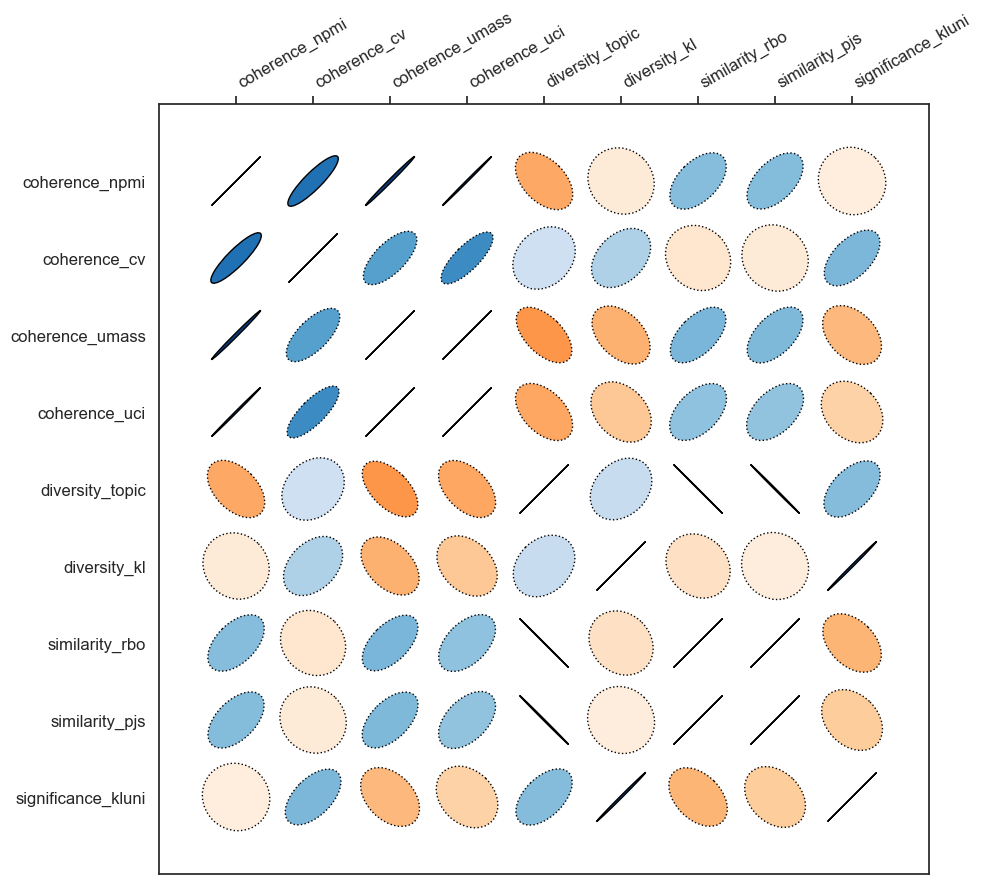

In [76]:
def corrplot(data, pvalues, labels, figure):
    ax = figure.add_subplot(1, 1, 1, aspect='equal')
    width, height = data.shape

    shrink = 0.9

    poscm = cm.get_cmap('Blues')
    negcm = cm.get_cmap('Oranges')

    for x in range(width):
        for y in range(height):
            d = data[x, y]
            c = pvalues[x, y]
            rotate = -45 if d > 0 else +45
            clrmap = poscm if d >= 0 else negcm
            d_abs = np.abs(d)
            ellipse = Ellipse((x, y),
                              width=1 * shrink,
                              height=(shrink - d_abs * shrink),
                              angle=rotate)
            ellipse.set_edgecolor('black')
            ellipse.set_facecolor(clrmap(d_abs))
            if c > 0.05:
                ellipse.set_linestyle('dotted')
            ax.add_artist(ellipse)

    ax.set_xlim(-1, width)
    ax.set_ylim(-1, height)

    ax.xaxis.tick_top()
    xtickslocs = np.arange(len(labels))
    ax.set_xticks(xtickslocs)
    ax.set_xticklabels(labels, rotation=30, fontsize=12, ha='left')

    ax.invert_yaxis()
    ytickslocs = np.arange(len(labels))
    ax.set_yticks(ytickslocs)
    ax.set_yticklabels(labels, fontsize=12)

    plt.show()

# Now use the adjusted `corrplot` function
figure = plt.figure(figsize=(10, 10))
corrplot(corr_matrix, p_values, metric_corr_df.columns, figure)

We can see that the coherence metrics are highly correlated with each other, as well as the similartiy metrics. This is not the case for the diversity metrics. We also notice a negative relation between the similarity metrics and the topic diversity, which sounds reasonable.